In [1]:
import pandas as pd
import csv
import os
import datetime
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import time
import pycountry

In [2]:
#Covid and flight data
covid_data = pd.read_csv("/Users/aforseth/Desktop/School/Madison/Spring 2023/Econ 695 - Topics In Economic Data Analysis/research_fun/US_counties_COVID19_health_weather_data 4.csv")

In [3]:
#column_names = covid_data.columns.tolist()

In [4]:
#column_names

In [5]:
#covid_data.loc[(covid_data["county"]=="New York City")]

In [6]:
# Keep the following 
# Date, county, state, fips, cases, cases, stay_at_home_announced, 
# stay_at_home_effective, total population, population density, 

In [41]:
covid_data

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
3,2020-01-24,Cook,Illinois,17031,1,0.0,no,no,41.840039,-87.816716,...,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333,2020-03-20,2020-03-21
4,2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790326,2020-12-04,Sweetwater,Wyoming,56037,2077,10.0,no,no,41.659538,-108.879567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790327,2020-12-04,Teton,Wyoming,56039,1724,2.0,no,no,43.934776,-110.589759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790328,2020-12-04,Uinta,Wyoming,56041,1175,5.0,no,no,41.287648,-110.547639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790329,2020-12-04,Washakie,Wyoming,56043,517,8.0,no,no,43.904970,-107.682819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Getting rid of covid data variables we do not need 
# Covid data is now in df_cd
df_cd = covid_data.loc[:, ["date","county","state","fips","cases",
                        "deaths","stay_at_home_announced","stay_at_home_effective",
                       "population_density_per_sqmi","total_population","num_deaths",
                       "date_stay_at_home_announced", "date_stay_at_home_effective"
                        ]]

#covid_data["state"].unique()

In [8]:
#flight data
#reading flight data csv file into flight_data
cwd = os.getcwd()
flight_data = pd.read_csv("/Users/aforseth/Desktop/School/Madison/Spring 2023/Econ 695 - Topics In Economic Data Analysis/research_fun/alljoined_airlines.csv/alljoined_airlines.csv", chunksize=500000)


In [9]:
chunk_dict = {}
#Chunking the csv file so it can be handled by python. 

for i, chunk in enumerate(pd.read_csv("/Users/aforseth/Desktop/School/Madison/Spring 2023/Econ 695 - Topics In Economic Data Analysis/research_fun/alljoined_airlines.csv/alljoined_airlines.csv", chunksize=500000)):
    var_name = f"chunk_{i}" 
    chunk_dict[var_name] = chunk

/Users/aforseth/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
n = 0
for i in chunk_dict: 
    n = n+1
    globals()[f"chunk{n}"] = chunk_dict[i]

In [11]:
n = 0
for i in chunk_dict: 
    n = n+1
type(n)

int

In [12]:
#security delay access for later reference
security_delays = chunk20.loc[chunk20["SECURITY_DELAY"] > 1]

In [13]:
# combine all the chunks
# alljoined_airlines.csv data
combined_chunks = pd.concat([chunk1, chunk2, chunk3, chunk4, chunk5, chunk6, 
                             chunk7, chunk8, chunk9, chunk10, chunk11, chunk12
, chunk13 , chunk14, chunk15, chunk16, chunk17, chunk18,chunk19,
 chunk20, chunk21, chunk22, chunk23, chunk24, chunk25, chunk26, chunk26, chunk27,
chunk28, chunk29, chunk30, chunk31, chunk32, chunk33, chunk34, chunk35, chunk36, 
chunk37, chunk38, chunk39])

In [14]:
# rename combined chunks to something more appropriate
airline_data = combined_chunks.rename(columns={'ORGIN_AIPORT_ID': 'ORIGIN_AIPORT_ID'})

In [15]:
# airport_keys
airport_info = pd.read_csv("/Users/aforseth/Desktop/School/Madison/Spring 2023/Econ 695 - Topics In Economic Data Analysis/research_fun/aiport_info.csv")

In [16]:
# rename airport_keys column
airport_info = airport_info.rename(columns={'ORGIN_AIPORT_ID': 'ORIGIN_AIRPORT_ID'})

In [17]:
#merge airline data and aiport kyes
flight_data = pd.merge(airline_data, airport_info, on='ORIGIN_AIRPORT_ID', how="outer")

In [18]:
#jfk -> miami flights 
miami_nyc_airdf = flight_data.loc[(flight_data["ORIGIN_AIRPORT_ID"] == 12478) & (flight_data["DEST_AIRPORT_ID"] == 13303)]

#nyc -> LA
LA_nyc_airdf = flight_data.loc[(flight_data["ORIGIN_AIRPORT_ID"] == 12478) & (flight_data["DEST_AIRPORT_ID"] == 12892)]

#



# ORD(chicago) -> Las Vegas
chi_lv_airdf = flight_data.loc[(flight_data["ORIGIN_AIRPORT_ID"] == 13930) & (flight_data["DEST_AIRPORT_ID"] == 12889)]

# ORD(chicago) -> Seattle
chi_seattle_airdf = flight_data.loc[(flight_data["ORIGIN_AIRPORT_ID"] == 13930) & (flight_data["DEST_AIRPORT_ID"] == 14747)]





In [19]:
#continue changing FL_DATE variable format
miami_nyc_airdf.iloc[:, 0] = pd.to_datetime(miami_nyc_airdf['FL_DATE']) 
LA_nyc_airdf.iloc[:, 0] = pd.to_datetime(LA_nyc_airdf['FL_DATE']) 
chi_lv_airdf.iloc[:, 0] = pd.to_datetime(chi_lv_airdf['FL_DATE']) 
chi_seattle_airdf.iloc[:, 0] = pd.to_datetime(chi_seattle_airdf['FL_DATE']) 


/Users/aforseth/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [20]:
miami_nyc_airdf = miami_nyc_airdf.rename(columns={"Unnamed: 0": "date"})
LA_nyc_airdf = LA_nyc_airdf.rename(columns={"Unnamed: 0": "date"})
chi_lv_airdf = chi_lv_airdf.rename(columns={"Unnamed: 0": "date"})
chi_seattle_airdf = chi_seattle_airdf.rename(columns={"Unnamed: 0": "date"})

In [21]:
miami_nyc_airdf['count'] = miami_nyc_airdf.groupby('date')['date'].transform('count')
LA_nyc_airdf['count'] = LA_nyc_airdf.groupby('date')['date'].transform('count')
chi_lv_airdf['count'] = chi_lv_airdf.groupby('date')['date'].transform('count')
chi_seattle_airdf['count'] = chi_seattle_airdf.groupby('date')['date'].transform('count')

In [22]:
df_cd.loc[df_cd["county"] == "Cook"]

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,population_density_per_sqmi,total_population,num_deaths,date_stay_at_home_announced,date_stay_at_home_effective
3,2020-01-24,Cook,Illinois,17031,1,0.0,no,no,5531.878539,5227575.0,57660.0,2020-03-20,2020-03-21
6,2020-01-25,Cook,Illinois,17031,1,0.0,no,no,5531.878539,5227575.0,57660.0,2020-03-20,2020-03-21
11,2020-01-26,Cook,Illinois,17031,1,0.0,no,no,5531.878539,5227575.0,57660.0,2020-03-20,2020-03-21
16,2020-01-27,Cook,Illinois,17031,1,0.0,no,no,5531.878539,5227575.0,57660.0,2020-03-20,2020-03-21
21,2020-01-28,Cook,Illinois,17031,1,0.0,no,no,5531.878539,5227575.0,57660.0,2020-03-20,2020-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
784498,2020-12-03,Cook,Illinois,17031,318324,6823.0,yes,yes,5531.878539,5227575.0,57660.0,2020-03-20,2020-03-21
785217,2020-12-03,Cook,Minnesota,27031,80,0.0,yes,yes,3.590684,5215.0,NaN,2020-03-25,2020-03-27
787532,2020-12-04,Cook,Georgia,13075,957,20.0,yes,yes,75.277126,17103.0,304.0,2020-04-02,2020-04-03
787718,2020-12-04,Cook,Illinois,17031,322122,6852.0,yes,yes,5531.878539,5227575.0,57660.0,2020-03-20,2020-03-21


In [23]:
#nyc covid data from original covid dataset
nyc_deaths = df_cd.loc[(df_cd["county"] == "New York City")]

#chicago deaths 
chi_deaths = df_cd.loc[(df_cd["county"] == "Cook")]


In [39]:
nyc_deaths
#chi_deaths

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,population_density_per_sqmi,total_population,num_deaths,date_stay_at_home_announced,date_stay_at_home_effective
416,2020-03-01,New York City,New York,NYC,1,0.0,no,no,28069.675983,8461961.0,71504.0,2020-03-20,2020-03-22
447,2020-03-02,New York City,New York,NYC,1,0.0,no,no,28069.675983,8461961.0,71504.0,2020-03-20,2020-03-22
480,2020-03-03,New York City,New York,NYC,2,0.0,no,no,28069.675983,8461961.0,71504.0,2020-03-20,2020-03-22
515,2020-03-04,New York City,New York,NYC,2,0.0,no,no,28069.675983,8461961.0,71504.0,2020-03-20,2020-03-22
561,2020-03-05,New York City,New York,NYC,4,0.0,no,no,28069.675983,8461961.0,71504.0,2020-03-20,2020-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776086,2020-11-30,New York City,New York,NYC,316724,24274.0,yes,yes,28069.675983,8461961.0,71504.0,2020-03-20,2020-03-22
779306,2020-12-01,New York City,New York,NYC,319301,24287.0,yes,yes,28069.675983,8461961.0,71504.0,2020-03-20,2020-03-22
782526,2020-12-02,New York City,New York,NYC,322501,24297.0,yes,yes,28069.675983,8461961.0,71504.0,2020-03-20,2020-03-22
785746,2020-12-03,New York City,New York,NYC,325806,24305.0,yes,yes,28069.675983,8461961.0,71504.0,2020-03-20,2020-03-22


In [27]:
nyc_deaths['date'] = pd.to_datetime(nyc_deaths['date'])
chi_deaths['date'] = pd.to_datetime(chi_deaths['date'])

<ipython-input-27-638d99c4df2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_deaths['date'] = pd.to_datetime(nyc_deaths['date'])
<ipython-input-27-638d99c4df2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_deaths['date'] = pd.to_datetime(chi_deaths['date'])


In [28]:
ny_mi_merged_table = pd.merge(miami_nyc_airdf, nyc_deaths, on='date', how='left')
ny_la_merged_table = pd.merge(LA_nyc_airdf, nyc_deaths, on='date', how='left')
chi_lv_merged = pd.merge(chi_lv_airdf, chi_deaths, on='date', how='left')
chi_seattle = pd.merge(chi_seattle_airdf, chi_deaths, on='date', how='left')

In [29]:
#LA_nyc_airdf
#chi_lv_airdf
#chi_seattle_airdf


In [30]:
# Add labels and title to the plot


In [31]:
ny_mi_merged_table = ny_mi_merged_table.dropna(subset =["cases"])
ny_la_merged_table = ny_la_merged_table.dropna(subset =["cases"])
chi_lv_merged = chi_lv_merged.dropna(subset =["cases"])
chi_seattle = chi_seattle.dropna(subset=["cases"])

In [32]:
X = ny_mi_merged_table['cases']
y = ny_mi_merged_table['count']

In [33]:
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     20.97
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           5.08e-06
Time:                        19:02:39   Log-Likelihood:                -4116.1
No. Observations:                1409   AIC:                             8236.
Df Residuals:                    1407   BIC:                             8247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1562      0.243     29.390      0.0

Text(0, 0.5, 'Number Of Flights')

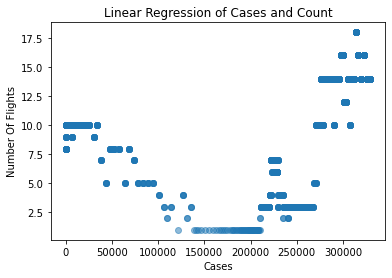

In [34]:
#ny -> miami

plt.scatter(ny_mi_merged_table['cases'], ny_mi_merged_table['count'], alpha=0.5)
predictions = model.predict(X)
# Add regression line to the scatter plot
#plt.plot(ny_mi_merged_table['cases'], predictions, color='red')

# Add labels and title to the plot
plt.title('Linear Regression of Cases and Count')
plt.xlabel('Cases')
plt.ylabel('Number Of Flights')

# Display the plot
#plt.show()

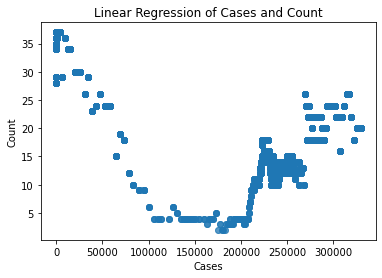

In [35]:
#nyc - la
#X = ny_la_merged_table['cases']
#y = ny_la_merged_table['count']

plt.scatter(ny_la_merged_table['cases'], ny_la_merged_table['count'], alpha=0.5)
#predictions = model.predict(X)

# Add regression line to the scatter plot
#plt.plot(ny_la_merged_table['cases'], predictions, color='red')

# Add labels and title to the plot
plt.title('Linear Regression of Cases and Count')
plt.xlabel('Cases')
plt.ylabel('Count')

# Display the plot
plt.show()

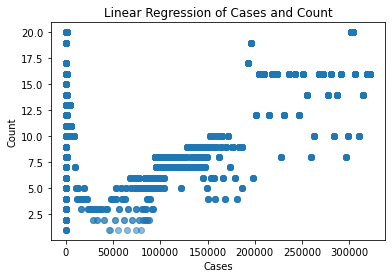

In [36]:
#chi -> LV

X = chi_lv_merged['cases']
y = chi_lv_merged['count']

plt.scatter(chi_lv_merged['cases'], chi_lv_merged['count'], alpha=0.5)
#predictions = model.predict(X)
# Add regression line to the scatter plot
#plt.plot(chi_lv_merged['cases'], predictions, color='red')

# Add labels and title to the plot
plt.title('Linear Regression of Cases and Count')
plt.xlabel('Cases')
plt.ylabel('Count')

# Display the plot
plt.show()

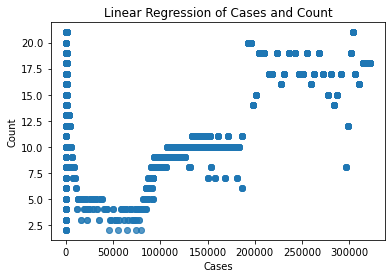

In [37]:
#chicago -> seattle

X = chi_seattle['cases']
y = chi_seattle['count']

plt.scatter(chi_seattle['cases'], chi_seattle['count'], alpha=0.5)
#predictions = model.predict(X)
# Add regression line to the scatter plot
#plt.plot(chi_seattle['cases'], predictions, color='red')

# Add labels and title to the plot
plt.title('Linear Regression of Cases and Count')
plt.xlabel('Cases')
plt.ylabel('Count')

# Display the plot
plt.show()




In [42]:
#airline_data

In [43]:
data = covid_data.head(100)

data.to_csv('covid_head100.csv', index=False)

In [44]:
# total flights by airline by moth 


# Turn nan value to zero
# We will ignore "zero" values when it comes time to do the data visualization
flight_data["YEAR"].fillna(0, inplace=True)

In [45]:
# Turn nan value to zero
# We will ignore "zero" values when it comes time to do the data visualization

flight_data["YEAR"] = flight_data["YEAR"].astype(int)

In [46]:
#We want to repeat the same thing for month

flight_data["MONTH"].fillna(0, inplace=True)
flight_data["MONTH"] = flight_data["MONTH"].astype(int)

In [47]:
flight_data_AA = flight_data[flight_data['OP_UNIQUE_CARRIER'] == 'AA']
flight_data_AS = flight_data[flight_data['OP_UNIQUE_CARRIER'] == 'AS']
flight_data_B6 = flight_data[flight_data['OP_UNIQUE_CARRIER'] == 'B6']
flight_data_DL = flight_data[flight_data['OP_UNIQUE_CARRIER'] == 'DL']
flight_data_F9 = flight_data[flight_data['OP_UNIQUE_CARRIER'] == 'F9']
flight_data_G4 = flight_data[flight_data['OP_UNIQUE_CARRIER'] == 'G4']
flight_data_HA = flight_data[flight_data['OP_UNIQUE_CARRIER'] == 'HA']
flight_data_NK = flight_data[flight_data['OP_UNIQUE_CARRIER'] == 'NK']
flight_data_UA = flight_data[flight_data['OP_UNIQUE_CARRIER'] == 'UA']
flight_data_WN = flight_data[flight_data['OP_UNIQUE_CARRIER'] == 'WN']

In [48]:
counts_aa = flight_data_AA.groupby(['YEAR', 'MONTH']).size() 
counts_as = flight_data_AS.groupby(['YEAR', 'MONTH']).size() 
counts_b6 = flight_data_B6.groupby(['YEAR', 'MONTH']).size() 
counts_dl = flight_data_DL.groupby(['YEAR', 'MONTH']).size() 
counts_f9 = flight_data_F9.groupby(['YEAR', 'MONTH']).size() 
counts_g4 = flight_data_G4.groupby(['YEAR', 'MONTH']).size() 
counts_ha = flight_data_HA.groupby(['YEAR', 'MONTH']).size() 
counts_nk = flight_data_NK.groupby(['YEAR', 'MONTH']).size() 
counts_ua = flight_data_UA.groupby(['YEAR', 'MONTH']).size()
counts_wn = flight_data_WN.groupby(['YEAR', 'MONTH']).size() 


In [49]:
counts_ua = flight_data_UA.groupby(['YEAR']).size()
counts_wn = flight_data_WN.groupby(['YEAR']).size() 
counts_as = flight_data_AS.groupby(['YEAR']).size()
counts_aa = flight_data_AA.groupby(['YEAR']).size()
counts_f9 = flight_data_F9.groupby(['YEAR']).size()
counts_g4 = flight_data_G4.groupby(['YEAR']).size()
counts_nk = flight_data_NK.groupby(['YEAR']).size()
counts_ha = flight_data_HA.groupby(['YEAR']).size()
counts_ua = flight_data_UA.groupby(['YEAR']).size()
counts_wn = flight_data_WN.groupby(['YEAR']).size()

In [50]:
counts_wn = counts_wn.reset_index().rename(columns={'index': 'index_new'})

In [51]:
counts_aa = counts_aa.reset_index().rename(columns={'index': 'index_new'})

In [52]:
counts_ua = counts_ua.reset_index().rename(columns={'index': 'index_new'})

In [53]:
counts_as = counts_as.reset_index().rename(columns={'index': 'index_new'})

In [54]:
counts_f9 = counts_f9.reset_index().rename(columns={'index': 'index_new'})

In [55]:
counts_g4 = counts_g4.reset_index().rename(columns={'index': 'index_new'})

In [56]:
counts_nk = counts_nk.reset_index().rename(columns={'index': 'index_new'})

In [57]:
counts_ha = counts_ha.reset_index().rename(columns={'index': 'index_new'})

In [58]:
counts_wn = counts_wn.rename(columns={counts_wn.columns[1]:"Total"})

In [59]:
counts_aa = counts_aa.rename(columns={counts_aa.columns[1]:"Total"})

In [60]:
counts_ua = counts_ua.rename(columns={counts_ua.columns[1]:"Total"})

In [61]:
counts_as = counts_as.rename(columns={counts_as.columns[1]:"Total"})

In [62]:
counts_f9 = counts_f9.rename(columns={counts_f9.columns[1]:"Total"})

In [63]:
counts_g4 = counts_g4.rename(columns={counts_g4.columns[1]:"Total"})

In [64]:
counts_nk = counts_nk.rename(columns={counts_nk.columns[1]:"Total"})

In [65]:
counts_ha = counts_ha.rename(columns={counts_nk.columns[1]:"Total"})

In [ ]:
counts_aa

<AxesSubplot:xlabel='YEAR'>

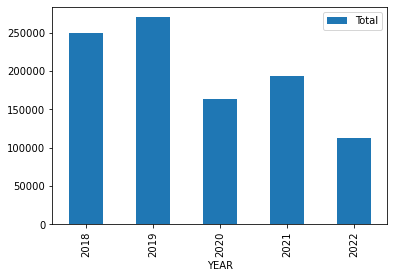

In [66]:
# American Airlines 

counts_as.plot(x='YEAR', y='Total', kind='bar')

<AxesSubplot:xlabel='YEAR'>

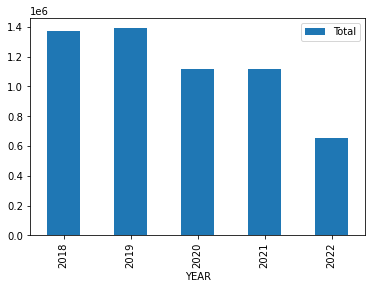

In [67]:
# Southwest
counts_wn.plot(x='YEAR', y='Total', kind='bar')

<AxesSubplot:xlabel='YEAR'>

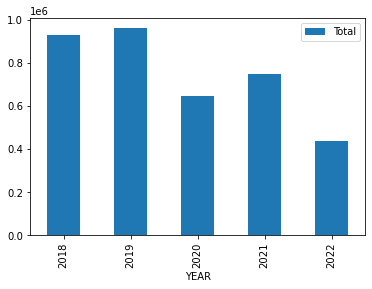

In [68]:
# American
#
counts_aa.plot(x='YEAR', y='Total', kind='bar')

<AxesSubplot:xlabel='YEAR'>

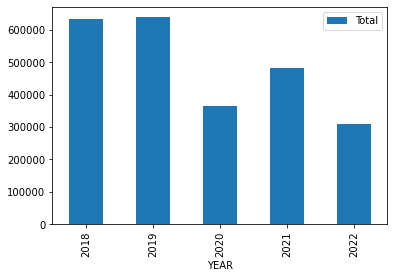

In [69]:
# United
counts_ua.plot(x='YEAR', y='Total', kind='bar')

<AxesSubplot:xlabel='YEAR'>

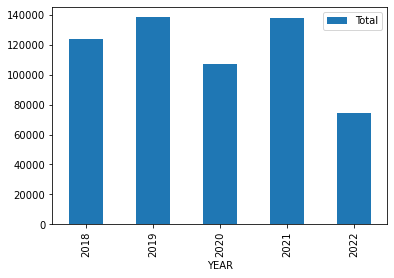

In [70]:
# United
counts_f9.plot(x='YEAR', y='Total', kind='bar')

<AxesSubplot:xlabel='YEAR'>

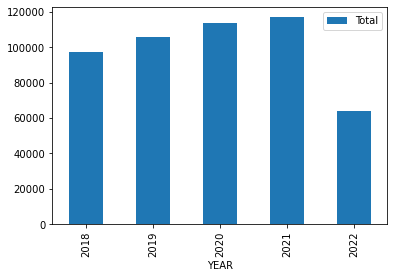

In [71]:
counts_g4.plot(x='YEAR', y='Total', kind='bar')

<AxesSubplot:xlabel='YEAR'>

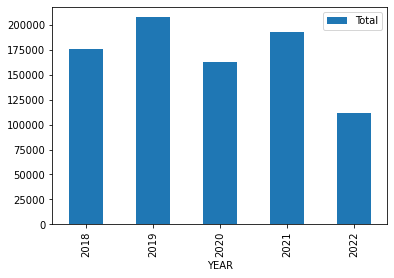

In [72]:
counts_nk.plot(x='YEAR', y='Total', kind='bar')

In [75]:
#counts_ha.plot(x='YEAR', y='Total', kind='bar')

In [76]:
# Carriers- International vs Domestic Flights By Year
# 

In [77]:
#flight_data
airline_data.head(100)

,Unnamed: 0,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,...,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,2018,1,1/26/18 00:00,UA,1252,14683,12266,-7.0,0.0,...,0.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2,2018,1,1/26/18 00:00,UA,1251,10721,13930,-9.0,0.0,...,0.0,-2.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,3,2018,1,1/26/18 00:00,UA,1250,13930,11423,7.0,7.0,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,4,2018,1,1/26/18 00:00,UA,1248,11618,13930,-8.0,0.0,...,0.0,-2.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,5,2018,1,1/26/18 00:00,UA,1247,11278,12266,-7.0,0.0,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2018,1,1/26/18 00:00,UA,1130,12266,14908,0.0,0.0,...,0.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
96,97,2018,1,1/26/18 00:00,UA,1130,14100,12266,-4.0,0.0,...,0.0,-2.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
97,98,2018,1,1/26/18 00:00,UA,1130,14908,11618,0.0,0.0,...,0.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
98,99,2018,1,1/26/18 00:00,UA,1129,14679,12264,4.0,4.0,...,0.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [78]:
#flight_data

In [79]:
#compile list of country names 
countries = []
for country in pycountry.countries:
    countries.append(country.name)
    
#countries

In [80]:
#country_replace = [country.lower().replace(" ", "") for country in countries]

In [81]:
flight_data.head(40)

,Unnamed: 0,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Description,Code.y
0,1.0,2018,1,1/26/18 00:00,UA,1252.0,14683.0,12266.0,-7.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"San Antonio, TX: San Antonio International",SAT
1,91.0,2018,1,1/26/18 00:00,UA,1140.0,14683.0,11292.0,-2.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"San Antonio, TX: San Antonio International",SAT
2,347.0,2018,1,1/26/18 00:00,UA,676.0,14683.0,11618.0,17.0,17.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"San Antonio, TX: San Antonio International",SAT
3,597.0,2018,1,1/26/18 00:00,UA,456.0,14683.0,11292.0,-4.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"San Antonio, TX: San Antonio International",SAT
4,785.0,2018,1,1/26/18 00:00,UA,286.0,14683.0,12264.0,-5.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"San Antonio, TX: San Antonio International",SAT
5,910.0,2018,1,1/25/18 00:00,UA,2392.0,14683.0,12266.0,0.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"San Antonio, TX: San Antonio International",SAT
6,970.0,2018,1,1/25/18 00:00,UA,2111.0,14683.0,12266.0,-3.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"San Antonio, TX: San Antonio International",SAT
7,973.0,2018,1,1/25/18 00:00,UA,2108.0,14683.0,12266.0,-2.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"San Antonio, TX: San Antonio International",SAT
8,982.0,2018,1,1/25/18 00:00,UA,2097.0,14683.0,13930.0,-1.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"San Antonio, TX: San Antonio International",SAT
9,1042.0,2018,1,1/25/18 00:00,UA,2024.0,14683.0,12266.0,-8.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"San Antonio, TX: San Antonio International",SAT


In [82]:
mask = flight_data['Description'].isin(countries)

In [83]:
#drop all nan values from dest_airport_id

#flight_data = flight_data.dropna(subset=["DEST_AIRPORT_ID"])
#flight_data.head(100000)

In [84]:
result = flight_data[flight_data['ORIGIN_AIRPORT_ID'] == 13744]
result

,Unnamed: 0,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Description,Code.y
20141802,NaN,0,0,NaN,NaN,NaN,13744.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Tokyo, Japan: Narita International",NRT


In [85]:
#Define a function to check if a location belongs to a country
#def check_location(location, countries):
#    for country in countries:
#        if country in location.lower():
#            return True
#    return False

def check_location(location, countries):
    if isinstance(location, float):
        return False
    else:
        location = str(location).lower()
        for country in countries:
            if country in location:
                return True
        return False


In [86]:
#for row in flight_data.tail(1000000).iterrows():
#    is_international = any(country in row["Description"] for country in countries)
    
#    if is_international == True:
#        row["Type"] = "international"
    
#    else:
#        row["Type"] =





In [87]:
# Create a new column called 'flight_type'
#start_time = time.time()

#print("total time taken was:" , total)

In [88]:
#for row in flight_data["flight_type"]:
#    if index == "international":
#        print(row)
    

In [95]:
result = flight_data[flight_data['DEST_AIRPORT_ID'] == 10920]
#result

In [90]:
flight_data["Type"] = flight_data.tail(10000).apply(lambda row: "international" if any(country in row["Description"] for country in countries) else "domestic", axis=1)




In [91]:
flight_data.tail(10000)

,Unnamed: 0,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Description,Code.y,Type
20134814,16090861.0,2021,10,10/6/21 00:00,UA,117.0,14955.0,12016.0,-17.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"Saipan, TT: Francisco C. Ada Saipan International",SPN,domestic
20134815,16091486.0,2021,10,10/23/21 00:00,UA,117.0,14955.0,12016.0,-18.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"Saipan, TT: Francisco C. Ada Saipan International",SPN,domestic
20134816,16350742.0,2021,11,11/30/21 00:00,UA,117.0,14955.0,12016.0,-9.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"Saipan, TT: Francisco C. Ada Saipan International",SPN,domestic
20134817,16352403.0,2021,11,11/29/21 00:00,UA,117.0,14955.0,12016.0,-24.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"Saipan, TT: Francisco C. Ada Saipan International",SPN,domestic
20134818,16354076.0,2021,11,11/28/21 00:00,UA,117.0,14955.0,12016.0,-13.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"Saipan, TT: Francisco C. Ada Saipan International",SPN,domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20144809,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wankie, Rhodesia: Wankie Town",WKM,domestic
20144810,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lake Charles, LA: Chennault Industrial Airpark",WQM,domestic
20144811,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"King Khalid Military City, Saudi Arabia: King ...",XWG,international
20144812,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Al Kharj, Saudi Arabia: Al Kharj Air Base",XWP,international


In [92]:

# Group the data by carrier, international/domestic status, and year
grouped_data = flight_data.groupby(["OP_UNIQUE_CARRIER", "Type", "YEAR"]).size().reset_index(name="Count")

grouped_data

,OP_UNIQUE_CARRIER,Type,YEAR,Count
0,AS,domestic,2018,121
1,AS,domestic,2020,166
2,AS,domestic,2021,130
3,AS,domestic,2022,188
4,DL,domestic,2022,56
5,F9,domestic,2018,71
6,F9,domestic,2019,461
7,F9,domestic,2020,150
8,F9,domestic,2021,316
9,F9,domestic,2022,144


In [93]:
#chicago deaths 
international = flight_data.loc[(flight_data["Type"] == "international")]

In [94]:
international

,Unnamed: 0,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Description,Code.y,Type
20138413,NaN,0,0,NaN,NaN,NaN,10088.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Malina Bay, AK: Malina Bay Airport",A75,international
20138445,NaN,0,0,NaN,NaN,NaN,10118.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Anaa, French Polynesia: Anaa Airport",AAA,international
20138446,NaN,0,0,NaN,NaN,NaN,10119.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrabury, Australia: Arrabury Station",AAB,international
20138447,NaN,0,0,NaN,NaN,NaN,10120.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"El Arish, Egypt: El Arish International",AAC,international
20138448,NaN,0,0,NaN,NaN,NaN,10121.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Annaba, Algeria: Rabah Bitat",AAE,international
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20144806,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ulan Bator, Mongolia: Chinggis Khaan Internati...",ULN,international
20144807,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kiev, Ukraine: Gostomel",UXH,international
20144811,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"King Khalid Military City, Saudi Arabia: King ...",XWG,international
20144812,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Al Kharj, Saudi Arabia: Al Kharj Air Base",XWP,international


In [ ]:
####JUNK
#tweets_df['Time'] = pd.to_datetime(tweets_df['Time'])
#nyc_deaths.loc[:, 'date']
#nyc_deaths.iloc[:, 0]
#prepare the nyc_deaths variable observations 
#nyc_deaths.iloc[:, 0] = pd.to_datetime(nyc_deaths['date'])
#change nyc deaths date format to something appropriate
#nyc_deaths.iloc[:, 0] = nyc_deaths.iloc[:, 0].dt.strftime('%-m/%-d/%y')
#nyc_deaths
#nyc_deaths_fin = pd.merge(miami_nyc_airdf, nyc_deaths, left_on="FL_DATE", right_on="date", how='outer')
#continue changing FL_DATE variable format
#miami_nyc_airdf.iloc[:, 0] = miami_nyc_airdf.iloc[:,0].dt.strftime('%-Y%-M%D')
#ombined_chunks.rename(columns={'ORGIN_AIPORT_ID': 'ORIGIN_AIPORT_ID'})


# miami_nyc_airdf["FL_DATE"]



#ax.set_xlabel('Month')
#ax.set_ylabel('Number of Flights')
#ax.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')

# show the plot
#plt.show()



flight_data['flight_type'] = ''

# Loop through each row in the data frame
#for index, row in flight_data.head(1000000).iterrows():
#    origin_location = row['Description']
#    destination_location = row['DEST_AIRPORT_ID']
    
    # Check if the destination is international or domestic
#    if check_location(origin_location, countries):
#        flight_data.at[index, 'flight_type'] = 'international'
#    else:
#        flight_data.at[index, 'flight_type'] = 'domestic'
        
        
#end_time = time.time()

#total = end_time - start_time